<a href="https://colab.research.google.com/github/Pakryeongmi/python_bigdata/blob/main/%EB%B9%84%ED%8A%B82205_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#모델 상태 저장

In [ ]:
from tensorflow import keras
(train_input,train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
test_scaled = test_input/255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
flat_layer = keras.layers.Flatten(input_shape=(28,28))
dense1= keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(flat_layer)
model.add(dense1)
model.add(keras.layers.Dropout(0.5))
model.add(dense2)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(train_scaled, train_target,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 12s 7ms/step - loss: 0.7488 - accuracy: 0.7393 - val_loss: 0.4777 - val_accuracy: 0.8293
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5144 - accuracy: 0.8168 - val_loss: 0.4228 - val_accuracy: 0.8456
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4680 - accuracy: 0.8336 - val_loss: 0.3981 - val_accuracy: 0.8549
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4451 - accuracy: 0.8403 - val_loss: 0.3869 - val_accuracy: 0.8562
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4292 - accuracy: 0.8457 - val_loss: 0.3746 - val_accuracy: 0.8622
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4143 - accuracy: 0.8512 - val_loss: 0.3660 - val_accuracy: 0.8637
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4007 - accuracy: 0.8580 - val_loss: 0.3600 - val_accuracy

In [ ]:
model.save_weights('model_weights_test.h5')

In [ ]:
model.save('model-whole_test.h5')

In [ ]:
!pwd

/content


In [ ]:
import sys

In [ ]:
model2 = keras.models.load_model('/content/model-whole_test.h5')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model2.weights)

[<tf.Variable 'dense/kernel:0' shape=(784, 100) dtype=float32, numpy=
array([[ 0.2753297 ,  0.1732647 , -0.4584221 , ..., -0.05187696,
         0.3659247 ,  0.08438304],
       [ 0.26250142, -0.41361517, -0.11593919, ..., -0.20031595,
        -0.14712483,  0.5177414 ],
       [ 0.6802207 , -0.433313  , -0.678238  , ..., -0.00926441,
        -1.243981  , -0.3796835 ],
       ...,
       [ 0.17216404, -0.24409549, -0.09180687, ...,  0.47210324,
        -0.32295683,  0.74938685],
       [-0.48210248, -0.2505069 , -0.13321677, ...,  0.9172338 ,
        -0.42192495,  0.4965729 ],
       [ 0.13846827, -0.5161987 , -0.44322807, ...,  0.4972061 ,
         0.04030861, -0.10381388]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
array([ 0.12645143, -0.33902708, -0.3537007 , -1.0176604 , -0.06842973,
       -1.2877933 , -0.3997788 , -0.51340145, -1.2048229 ,  0.13149089,
       -1.1230663 , -2.0634468 , -0.7268259 , -0.08426975, -0.57170784,
        0.14640437, -

In [ ]:
model2.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8788


[0.34390172362327576, 0.8787999749183655]

#콜백

In [ ]:
def add(a,b):
  print(f'add:{a},{b}')
  return a+b


In [ ]:
def sub(a,b):
  print(f'sub:{a},{b}')
  return a-b

In [ ]:
def doall(ls1,ls2,fn):
  s= []
  for  i in range(len(ls1)):
    s.append(fn(ls1[i],ls2[i]))
    return s

In [ ]:
re = doall([1,2,3],[4,5,6],add)
print(re)

add:1,4
[5]


In [ ]:
re = doall([1,2,3],[4,5,6],sub)
print(re)

sub:1,4
[-3]


In [ ]:

flat_layer = keras.layers.Flatten(input_shape=(28,28))
dense1= keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(flat_layer)
model.add(dense1)
model.add(keras.layers.Dropout(0.5))
model.add(dense2)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model_test.h5',save_best_only = True)
hist = model.fit(train_scaled, train_target,epochs=30,validation_split=0.2,callbacks=[checkpoint_cb])

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7383 - accuracy: 0.7450 - val_loss: 0.4776 - val_accuracy: 0.8268
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5107 - accuracy: 0.8198 - val_loss: 0.4250 - val_accuracy: 0.8458
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4683 - accuracy: 0.8335 - val_loss: 0.4023 - val_accuracy: 0.8536
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8434 - val_loss: 0.3895 - val_accuracy: 0.8554
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4241 - accuracy: 0.8507 - val_loss: 0.3697 - val_accuracy: 0.8655
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4113 - accuracy: 0.8532 - val_loss: 0.3644 - val_accuracy: 0.8667
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4002 - accuracy: 0.8560 - val_loss: 0.3547 - val_accuracy:

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model_test.h5',save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
hist = model.fit(train_scaled, train_target,epochs=1500,validation_split=0.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/1500
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3078 - accuracy: 0.8881 - val_loss: 0.3178 - val_accuracy: 0.8860
Epoch 2/1500
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.8874 - val_loss: 0.3202 - val_accuracy: 0.8873
Epoch 3/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3004 - accuracy: 0.8901 - val_loss: 0.3170 - val_accuracy: 0.8869
Epoch 4/1500
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2999 - accuracy: 0.8880 - val_loss: 0.3198 - val_accuracy: 0.8881
Epoch 5/1500
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2986 - accuracy: 0.8888 - val_loss: 0.3174 - val_accuracy: 0.8852
Epoch 6/1500
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2991 - accuracy: 0.8886 - val_loss: 0.3160 - val_accuracy: 0.8873
Epoch 7/1500
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.8917 - val_loss: 0.3154 -

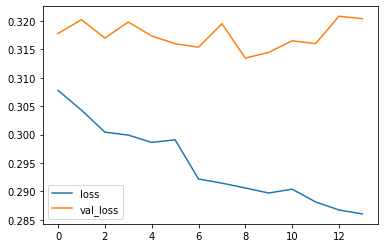

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

#CNN

In [ ]:
keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same',strides=1)

In [ ]:
keras.layers.MaxPooling2D(2,strides=2,padding='valid')

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [ ]:
(train_input, train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()


In [ ]:
train_rinput= train_input.reshape(-1,28,28,1)
test_rinput = test_input.reshape(-1,28,28,1)
train_rinput.shape

(60000, 28, 28, 1)

In [ ]:
train_scaled = train_rinput/255.0
test_scaled = test_rinput/255.0

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 100)              

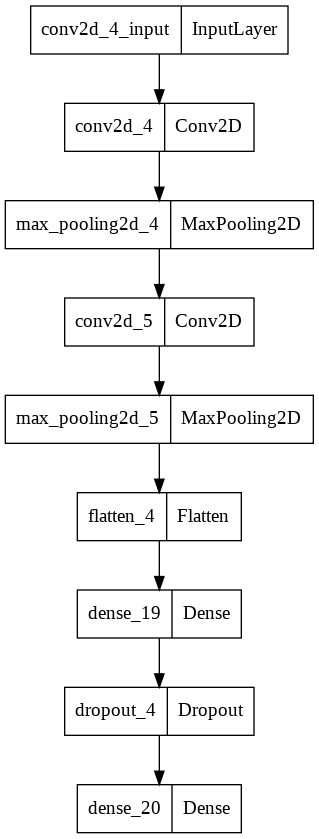

In [ ]:
keras.utils.plot_model(model)

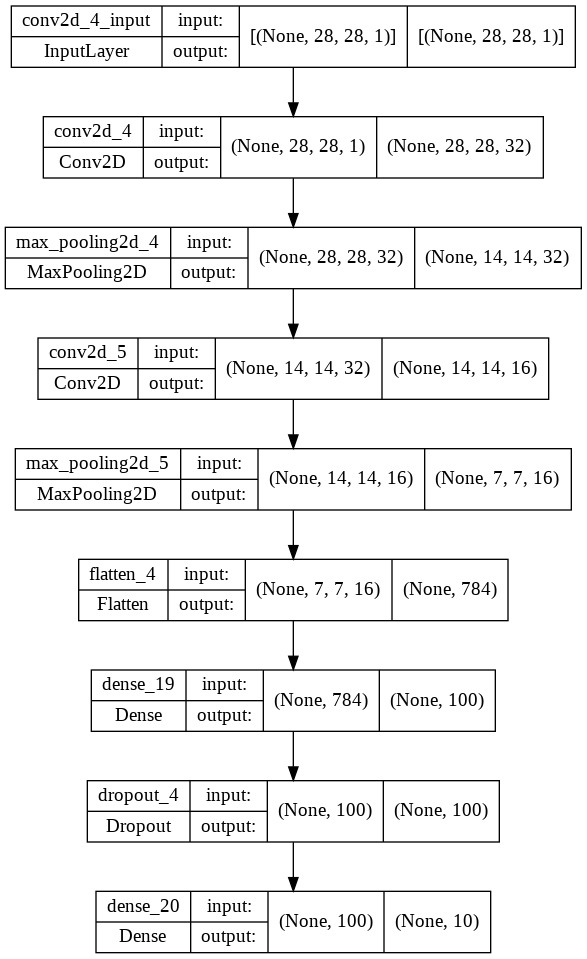

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from gc import callbacks
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
history = model.fit(train_scaled, train_target,validation_split=0.2,epochs=30000,callbacks=[early_stopping_cb])

Epoch 1/30000
1500/1500 [==============================] - 48s 31ms/step - loss: 0.6161 - accuracy: 0.7780 - val_loss: 0.3863 - val_accuracy: 0.8580
Epoch 2/30000
1500/1500 [==============================] - 47s 31ms/step - loss: 0.4179 - accuracy: 0.8508 - val_loss: 0.3327 - val_accuracy: 0.8785
Epoch 3/30000
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3685 - accuracy: 0.8681 - val_loss: 0.2962 - val_accuracy: 0.8917
Epoch 4/30000
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3377 - accuracy: 0.8770 - val_loss: 0.2916 - val_accuracy: 0.8940
Epoch 5/30000
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3153 - accuracy: 0.8866 - val_loss: 0.2678 - val_accuracy: 0.8989
Epoch 6/30000
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2999 - accuracy: 0.8917 - val_loss: 0.2581 - val_accuracy: 0.9034
Epoch 7/30000
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2862 - accuracy: 0.8962

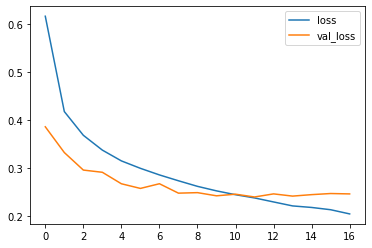

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
preds = model.predict(test_scaled[0:1])
print(preds)

[[4.3980003e-10 2.9647513e-12 2.4138250e-10 6.8486210e-11 2.9205067e-09
  6.3006922e-08 9.8050568e-10 1.9415424e-05 3.7755077e-11 9.9998057e-01]]


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 100)              

In [ ]:
model.save('best-cnn-mpdel.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std() )

-0.037451897 0.314617


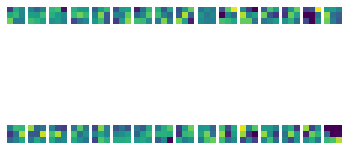

In [ ]:
fig, axs = plt.subplots(2,16)
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100,activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(10,activation='softmax'))
model2.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')



In [ ]:
conv2=model2.layers[0]
conv_weights2 = conv2.weights[0].numpy()

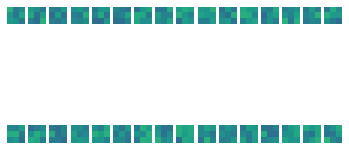

In [ ]:
fig, axs = plt.subplots(2,16)
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights2[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.coef_ = np.random.uniform(0,1)
print(lr.coef_)

0.5024683994229303


In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


In [ ]:
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")


In [ ]:
conv_acti = keras.Model(model.input,model.layers[0].output)
print(conv_acti)

In [ ]:
train_input[0:1].shape

(1, 28, 28)

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
inputs.shape

(1, 28, 28, 1)

In [ ]:
train_scaled[0:1].shape

(1, 28, 28, 1)

In [ ]:
feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


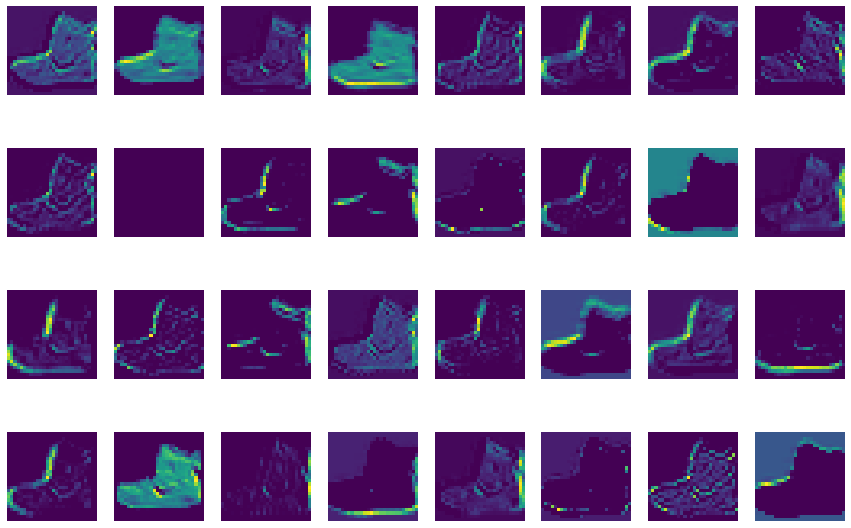

In [ ]:
fig, axs = plt.subplots(4,8,figsize=(15,10))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()

## 보너스 강의 - OpenCV 맛
HSV / 
H - 색조 , S - 채도, V - 명도

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image=np.zeros((100,180,3), np.uint8)

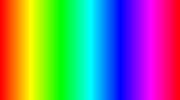

In [ ]:
for i in range(0,180):
  image[:,i,0]=i
image[:,:,1]=255
image[:,:,2]=255
img = cv2.cvtColor(image,cv2. COLOR_HSV2BGR)
cv2_imshow(img)

In [ ]:
image=np.zeros((100,255,3), np.uint8)

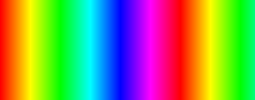

In [ ]:
for i in range(0,255):
  image[:,i,0]=i
image[:,:,1]=255
image[:,:,2]=255
img = cv2.cvtColor(image,cv2. COLOR_HSV2BGR)
cv2_imshow(img)

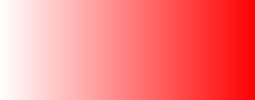

In [ ]:
image=np.zeros((100,255,3), np.uint8)
image[:,:,0]=0
for i in range(0,255):
  image[:,i,1]=i
image[:,:,2]=255
img = cv2.cvtColor(image,cv2. COLOR_HSV2BGR)
cv2_imshow(img)

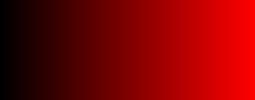

In [ ]:
image=np.zeros((100,255,3), np.uint8)
image[:,:,0]=0
for i in range(0,255):
  image[:,i,2]=i
image[:,:,1]=255
img = cv2.cvtColor(image,cv2. COLOR_HSV2BGR)
cv2_imshow(img)

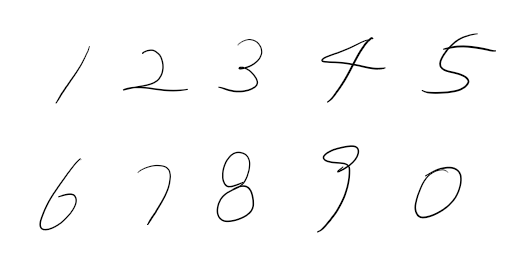

In [ ]:
path = '/content/drive/MyDrive/data/Number.png'
src_image = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(src_image)

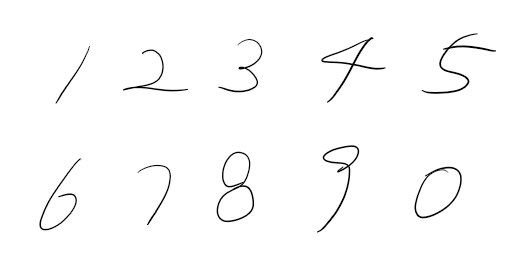

In [ ]:
cpy_image = src_image.copy()
gray_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
src_image.shape, gray_image.shape

((259, 532, 3), (259, 532))

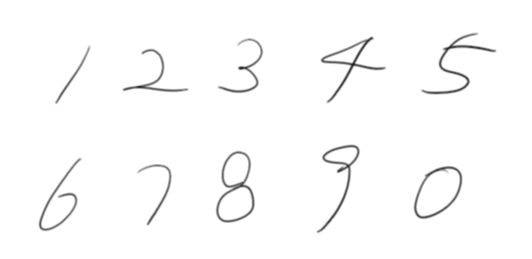

In [ ]:
blur_image = cv2.GaussianBlur(gray_image,(3,3),0)
cv2_imshow(blur_image)

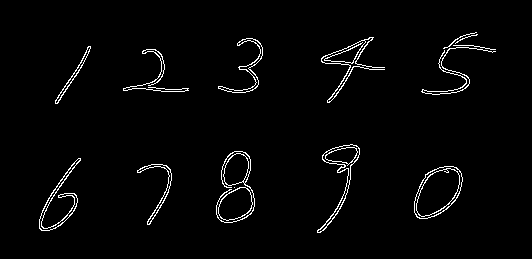

In [ ]:
canny_image = cv2.Canny(blur_image,100,200)
cv2_imshow(canny_image)

In [ ]:
from re import T
contours, _ = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
store_xywh = []
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  flag = False
  if w > 30 and h >= 40:
    for sv in store_xywh:
      gx = abs(sv[0]-x)
      gy = abs(sv[1]-y)
      if gx < 5 and gy < 5:
        flag = True
        break
  else:
    flag = True
  if flag == False:
    store_xywh.append([x,y,w,h])

for sv in store_xywh:
  print(sv)

[414, 166, 49, 53]
[137, 164, 35, 61]
[39, 158, 42, 73]
[216, 151, 39, 72]
[317, 144, 43, 89]
[123, 49, 66, 43]
[421, 47, 75, 48]
[55, 46, 36, 58]
[218, 38, 45, 55]
[321, 37, 64, 66]


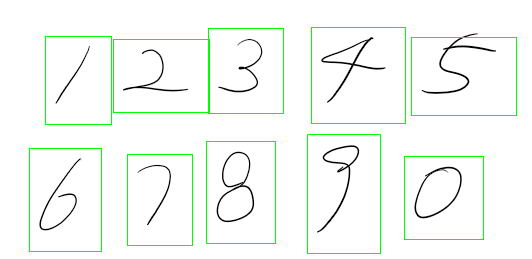

In [ ]:
for sv in store_xywh:
  x,y,w,h = sv
  cv2.rectangle(src_image,(x-10, y-10), (x+w+20, y+h+20), (0,255,0), 1)
cv2_imshow(src_image)

## 손글씨

In [ ]:
(image_train, label_train), (image_test, label_test) = keras.datasets.mnist.load_data()
print(image_train.shape)

(60000, 28, 28)


In [ ]:
np.unique(label_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
from sklearn import svm

In [ ]:
image_train2 = image_train.reshape(-1, 28*28)
image_test2 = image_test.reshape(-1, 28*28)

In [ ]:
svm = svm.SVC() #svm의 분류 모델 생성
svm.fit(image_train2, label_train)

SVC()

In [ ]:
pval = svm.predict(image_test2)

In [ ]:
from sklearn import metrics

In [ ]:
score = metrics.accuracy_score(pval, label_test)
print(score)

0.9792


In [ ]:
from keras.utils import np_utils

In [ ]:
label_train2 = np_utils.to_categorical(label_train)
label_test2 = np_utils.to_categorical(label_test)
print(label_train[0])
print(label_train2[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
scaled_train = image_train/255.0 
scaled_test = image_test/255.0

In [ ]:
from keras import layers, models

In [ ]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(layers.Dense(28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(image_train2, label_train2, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8533 - accuracy: 0.5750
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0872 - accuracy: 0.7035
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9864 - accuracy: 0.7603
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9049 - accuracy: 0.7916
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9056 - accuracy: 0.7953
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9118 - accuracy: 0.7868
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9022 - accuracy: 0.7789
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8925 - accuracy: 0.7824
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8490 - accuracy: 0.7932
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.847

In [ ]:
score = model.evaluate(image_test2, label_test2)
print(score)

313/313 [==============================] - 2s 5ms/step - loss: 1.4638 - accuracy: 0.7716
[1.4637504816055298, 0.7716000080108643]


In [ ]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(784,)))
#model.add(layers.Dense(28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(image_train2, label_train2, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4310 - accuracy: 0.8639
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5865 - accuracy: 0.9209
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4893 - accuracy: 0.9363
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4616 - accuracy: 0.9426
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4139 - accuracy: 0.9492
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3959 - accuracy: 0.9527
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3818 - accuracy: 0.9545
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.9587
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3430 - accuracy: 0.9622
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - l

In [ ]:
score = model.evaluate(image_test2, label_test2)
print(score)

313/313 [==============================] - 1s 2ms/step - loss: 2.6878 - accuracy: 0.9637
[2.6877620220184326, 0.963699996471405]
